In [15]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('housing.data', delim_whitespace=True, header=None)

In [3]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
df.columns = col_name

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()

In [12]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [13]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

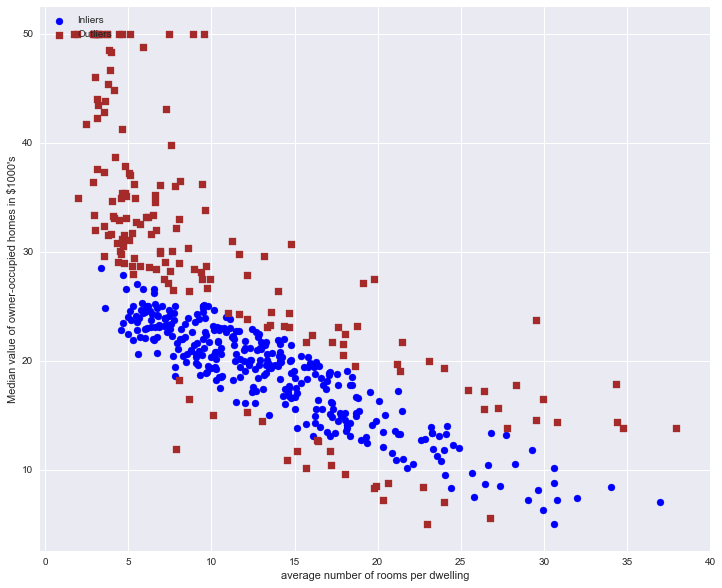

In [17]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()